<b>Dependencias</b>

In [2]:
# Se importan las librerías requeridas
import numpy as np
import pandas as pd
import pickle # Dependencia utilizada para salvar y cargar el modelo entrenado.
from os import path

# Se importan las librerías para la normalización de los datos.
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# Se importan las librerías para imprimir los resultados.
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils import plot_model

In [3]:
feature=["destination_port", "flow_duration", "total_fwd_packets", "total_backward_packets",
    "total_length_of_fwd_packets", "total_length_of_bwd_packets", "fwd_packet_length_max",
    "fwd_packet_length_min", "fwd_packet_length_mean", "fwd_packet_length_std",
    "bwd_packet_length_max", "bwd_packet_length_min", "bwd_packet_length_mean",
    "bwd_packet_length_std", "flow_bytes/s", "flow_packets/s", "flow_iat_mean",
    "flow_iat_std", "flow_iat_max", "flow_iat_min", "fwd_iat_total", "fwd_iat_mean",
    "fwd_iat_std", "fwd_iat_max", "fwd_iat_min", "bwd_iat_total", "bwd_iat_mean",
    "bwd_iat_std", "bwd_iat_max", "bwd_iat_min", "fwd_psh_flags", "bwd_psh_flags",
    "fwd_urg_flags", "bwd_urg_flags", "fwd_header_length", "bwd_header_length",
    "fwd_packets/s", "bwd_packets/s", "min_packet_length", "max_packet_length",
    "packet_length_mean", "packet_length_std", "packet_length_variance",
    "fin_flag_count", "syn_flag_count", "rst_flag_count", "psh_flag_count",
    "ack_flag_count", "urg_flag_count", "cwe_flag_count", "ece_flag_count",
    "down/up_ratio", "average_packet_size", "avg_fwd_segment_size",
    "avg_bwd_segment_size", "fwd_header_length.1", "fwd_avg_bytes/bulk",
    "fwd_avg_packets/bulk", "fwd_avg_bulk_rate", "bwd_avg_bytes/bulk",
    "bwd_avg_packets/bulk", "bwd_avg_bulk_rate", "subflow_fwd_packets",
    "subflow_fwd_bytes", "subflow_bwd_packets", "subflow_bwd_bytes",
    "init_win_bytes_forward", "init_win_bytes_backward", "act_data_pkt_fwd",
    "min_seg_size_forward", "active_mean", "active_std", "active_max", "active_min",
    "idle_mean", "idle_std", "idle_max", "idle_min", "label"]

In [4]:
train='input/cicd/wwh-CIC.csv'
train_data=pd.read_csv(train, header=0, names=feature, low_memory=False)
# test_data=pd.read_csv(test,names=feature)
# Cargar el archivo CSV con los ajustes previos
# Reemplazar valores infinitos con NaN
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
#Eliminar filas con NaN generados por valores infinitos
train_data.dropna(inplace=True)

In [5]:
train_data

destination_port  flow_duration  total_fwd_packets  \
0                     80          38308                  1   
1                    389            479                 11   
2                     88           1095                 10   
3                    389          15206                 17   
4                     88           1092                  9   
...                  ...            ...                ...   
692698                53          32215                  4   
692699                53            324                  2   
692700             58030             82                  2   
692701                53        1048635                  6   
692702                53          94939                  4   

        total_backward_packets  total_length_of_fwd_packets  \
0                            1                            6   
1                            5                          172   
2                            6                         3150   
3                           12                         3452   
4                            6                         3150   
...                        ...                          ...   
692698                       2                          112   
692699                       2                           84   
692700                       1                           31   
692701                       2                          192   
692702                       2                          188   

        total_length_of_bwd_packets  fwd_packet_length_max  \
0                                 6                      6   
1                               326                     79   
2                              3150                   1575   
3                              6660                   1313   
4                              3152                   1575   
...                             ...                    ...   
692698                          152                     28   
692699                          362                     42   
692700                            6                     31   
692701                          256                     32   
692702                          226                     47   

        fwd_packet_length_min  fwd_packet_length_mean  fwd_packet_length_std  \
0                           6                6.000000               0.000000   
1                           0               15.636364              31.449238   
2                           0              315.000000             632.561635   
3                           0              203.058823             425.778474   
4                           0              350.000000             694.509719   
...                       ...                     ...                    ...   
692698                     28               28.000000               0.000000   
692699                     42               42.000000               0.000000   
692700                      0               15.500000              21.920310   
692701                     32               32.000000               0.000000   
692702                     47               47.000000               0.000000   

        ...  min_seg_size_forward  active_mean  active_std  active_max  \
0       ...                    20          0.0         0.0           0   
1       ...                    32          0.0         0.0           0   
2       ...                    32          0.0         0.0           0   
3       ...                    32          0.0         0.0           0   
4       ...                    32          0.0         0.0           0   
...     ...                   ...          ...         ...         ...   
692698  ...                    20          0.0         0.0           0   
692699  ...                    20          0.0         0.0           0   
692700  ...                    32          0.0         0.0           0   
692701  ...                    20          0.0         0.0  

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691406 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   destination_port             691406 non-null  int64  
 1   flow_duration                691406 non-null  int64  
 2   total_fwd_packets            691406 non-null  int64  
 3   total_backward_packets       691406 non-null  int64  
 4   total_length_of_fwd_packets  691406 non-null  int64  
 5   total_length_of_bwd_packets  691406 non-null  int64  
 6   fwd_packet_length_max        691406 non-null  int64  
 7   fwd_packet_length_min        691406 non-null  int64  
 8   fwd_packet_length_mean       691406 non-null  float64
 9   fwd_packet_length_std        691406 non-null  float64
 10  bwd_packet_length_max        691406 non-null  int64  
 11  bwd_packet_length_min        691406 non-null  int64  
 12  bwd_packet_length_mean       691406 non-null  float64
 13  bwd_

In [7]:
train_data.describe().T

count          mean           std  min    25%  \
destination_port             691406.0  5.683120e+03  1.572234e+04  0.0   53.0   
flow_duration                691406.0  2.805421e+07  4.278968e+07 -1.0  202.0   
total_fwd_packets            691406.0  9.570718e+00  7.478982e+02  1.0    2.0   
total_backward_packets       691406.0  1.023296e+01  9.851272e+02  0.0    1.0   
total_length_of_fwd_packets  691406.0  5.561296e+02  6.169395e+03  0.0   12.0   
...                               ...           ...           ...  ...    ...   
active_min                   691406.0  6.327032e+04  6.056634e+05  0.0    0.0   
idle_mean                    691406.0  2.215270e+07  3.814785e+07  0.0    0.0   
idle_std                     691406.0  4.752643e+05  4.492673e+06  0.0    0.0   
idle_max                     691406.0  2.256399e+07  3.850662e+07  0.0    0.0   
idle_min                     691406.0  2.177450e+07  3.810129e+07  0.0    0.0   

                                 50%          75%          max  
destination_port                80.0       443.00      65487.0  
flow_duration                61561.0  83086874.75  119999998.0  
total_fwd_packets                2.0         7.00     203943.0  
total_backward_packets           2.0         6.00     272353.0  
total_length_of_fwd_packets     82.0       365.00    1224076.0  
...                              ...          ...          ...  
active_min                       0.0       989.00  100000000.0  
idle_mean                        0.0  16000000.00  120000000.0  
idle_std                         0.0         0.00   76900000.0  
idle_max                         0.0  18100000.00  120000000.0  
idle_min                         0.0  10000000.00  120000000.0  

[78 rows x 8 columns]

In [8]:
train_data['label'].value_counts()

label
BENIGN              439683
DoS Hulk            230124
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: count, dtype: int64

In [9]:
# Cambiando las categorías para 'normal' and 'abnormal'
bin_data = train_data.copy()
bin_label = pd.DataFrame(train_data.label.map(lambda x:'normal' if x=='BENIGN' else 'abnormal'))
bin_data['label'] = bin_label
bin_data

destination_port  flow_duration  total_fwd_packets  \
0                     80          38308                  1   
1                    389            479                 11   
2                     88           1095                 10   
3                    389          15206                 17   
4                     88           1092                  9   
...                  ...            ...                ...   
692698                53          32215                  4   
692699                53            324                  2   
692700             58030             82                  2   
692701                53        1048635                  6   
692702                53          94939                  4   

        total_backward_packets  total_length_of_fwd_packets  \
0                            1                            6   
1                            5                          172   
2                            6                         3150   
3                           12                         3452   
4                            6                         3150   
...                        ...                          ...   
692698                       2                          112   
692699                       2                           84   
692700                       1                           31   
692701                       2                          192   
692702                       2                          188   

        total_length_of_bwd_packets  fwd_packet_length_max  \
0                                 6                      6   
1                               326                     79   
2                              3150                   1575   
3                              6660                   1313   
4                              3152                   1575   
...                             ...                    ...   
692698                          152                     28   
692699                          362                     42   
692700                            6                     31   
692701                          256                     32   
692702                          226                     47   

        fwd_packet_length_min  fwd_packet_length_mean  fwd_packet_length_std  \
0                           6                6.000000               0.000000   
1                           0               15.636364              31.449238   
2                           0              315.000000             632.561635   
3                           0              203.058823             425.778474   
4                           0              350.000000             694.509719   
...                       ...                     ...                    ...   
692698                     28               28.000000               0.000000   
692699                     42               42.000000               0.000000   
692700                      0               15.500000              21.920310   
692701                     32               32.000000               0.000000   
692702                     47               47.000000               0.000000   

        ...  min_seg_size_forward  active_mean  active_std  active_max  \
0       ...                    20          0.0         0.0           0   
1       ...                    32          0.0         0.0           0   
2       ...                    32          0.0         0.0           0   
3       ...                    32          0.0         0.0           0   
4       ...                    32          0.0         0.0           0   
...     ...                   ...          ...         ...         ...   
692698  ...                    20          0.0         0.0           0   
692699  ...                    20          0.0         0.0           0   
692700  ...                    32          0.0         0.0           0   
692701  ...                    20          0.0         0.0  

In [10]:
# Seleccionando las columnas con atributos numéricos del conjunto de datos
numeric_col = bin_data.select_dtypes(include='number').columns
numeric_col

Index(['destination_port', 'flow_duration', 'total_fwd_packets',
       'total_backward_packets', 'total_length_of_fwd_packets',
       'total_length_of_bwd_packets', 'fwd_packet_length_max',
       'fwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'bwd_packet_length_max',
       'bwd_packet_length_min', 'bwd_packet_length_mean',
       'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin_flag_count',
       'syn_flag_co

In [11]:
# Utilizando el scaler estandar para la normalización de los datos
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

# Llamando a la función de normalización
bin_data = standardization(bin_data,numeric_col)

In [12]:
# Codificando las etiquetas 'abnormal' y 'normal' a nivel binario. (0,1)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label
bin_data

destination_port  flow_duration  total_fwd_packets  \
0              -0.356380      -0.654735          -0.011460   
1              -0.336726      -0.655620           0.001911   
2              -0.355871      -0.655605           0.000574   
3              -0.336726      -0.655275           0.009934   
4              -0.355871      -0.655605          -0.000763   
...                  ...            ...                ...   
692698         -0.358097      -0.654878          -0.007449   
692699         -0.358097      -0.655623          -0.010123   
692700          3.329461      -0.655629          -0.010123   
692701         -0.358097      -0.631124          -0.004774   
692702         -0.358097      -0.653412          -0.007449   

        total_backward_packets  total_length_of_fwd_packets  \
0                    -0.009372                    -0.089171   
1                    -0.005312                    -0.062264   
2                    -0.004297                     0.420442   
3                     0.001794                     0.469393   
4                    -0.004297                     0.420442   
...                        ...                          ...   
692698               -0.008357                    -0.071989   
692699               -0.008357                    -0.076528   
692700               -0.009372                    -0.085119   
692701               -0.008357                    -0.059022   
692702               -0.008357                    -0.059670   

        total_length_of_bwd_packets  fwd_packet_length_max  \
0                         -0.007588              -0.377384   
1                         -0.007446              -0.256570   
2                         -0.006187               2.219292   
3                         -0.004622               1.785685   
4                         -0.006186               2.219292   
...                             ...                    ...   
692698                    -0.007523              -0.340974   
692699                    -0.007429              -0.317804   
692700                    -0.007588              -0.336009   
692701                    -0.007477              -0.334354   
692702                    -0.007490              -0.309530   

        fwd_packet_length_min  fwd_packet_length_mean  fwd_packet_length_std  \
0                   -0.177020               -0.346490              -0.366976   
1                   -0.294406               -0.285411              -0.228011   
2                   -0.294406                1.612049               2.428138   
3                   -0.294406                0.902531               1.514421   
4                   -0.294406                1.833890               2.701870   
...                       ...                     ...                    ...   
692698               0.253399               -0.207047              -0.366976   
692699               0.527302               -0.118310              -0.366976   
692700              -0.294406               -0.286276              -0.270116   
692701               0.331657               -0.181694              -0.366976   
692702               0.625124               -0.086619              -0.366976   

        ...  active_mean  active_std  active_max  active_min  idle_mean  \
0       ...    -0.131771   -0.100491   -0.148812   -0.104465  -0.580707   
1       ...    -0.131771   -0.100491   -0.148812   -0.104465  -0.580707   
2       ...    -0.131771   -0.100491   -0.148812   -0.104465  -0.580707   
3       ...    -0.131771   -0.100491   -0.148812   -0.104465  -0.580707   
4       ...    -0.131771   -0.100491   -0.148812   -0.104465  -0.580707   
...     ...          ...         ...         ...         ...        ...   
692698  ...    -0.131771   -0.100491   -0.148812   -0.104465  -0.580707   
692699  ...    -0.131771   -0.100491   -0.148812   -0.104465  -0.580707   
692700  ...    -0.131771   -0.100491   -0.148812   -0.104465  -0.580707   
692701  ...    -0.131771   -0.100491   -0.148812  

In [13]:
# Eliminando la columna categórica
bin_data.drop(labels= ['label'], axis=1, inplace=True)
bin_data

destination_port  flow_duration  total_fwd_packets  \
0              -0.356380      -0.654735          -0.011460   
1              -0.336726      -0.655620           0.001911   
2              -0.355871      -0.655605           0.000574   
3              -0.336726      -0.655275           0.009934   
4              -0.355871      -0.655605          -0.000763   
...                  ...            ...                ...   
692698         -0.358097      -0.654878          -0.007449   
692699         -0.358097      -0.655623          -0.010123   
692700          3.329461      -0.655629          -0.010123   
692701         -0.358097      -0.631124          -0.004774   
692702         -0.358097      -0.653412          -0.007449   

        total_backward_packets  total_length_of_fwd_packets  \
0                    -0.009372                    -0.089171   
1                    -0.005312                    -0.062264   
2                    -0.004297                     0.420442   
3                     0.001794                     0.469393   
4                    -0.004297                     0.420442   
...                        ...                          ...   
692698               -0.008357                    -0.071989   
692699               -0.008357                    -0.076528   
692700               -0.009372                    -0.085119   
692701               -0.008357                    -0.059022   
692702               -0.008357                    -0.059670   

        total_length_of_bwd_packets  fwd_packet_length_max  \
0                         -0.007588              -0.377384   
1                         -0.007446              -0.256570   
2                         -0.006187               2.219292   
3                         -0.004622               1.785685   
4                         -0.006186               2.219292   
...                             ...                    ...   
692698                    -0.007523              -0.340974   
692699                    -0.007429              -0.317804   
692700                    -0.007588              -0.336009   
692701                    -0.007477              -0.334354   
692702                    -0.007490              -0.309530   

        fwd_packet_length_min  fwd_packet_length_mean  fwd_packet_length_std  \
0                   -0.177020               -0.346490              -0.366976   
1                   -0.294406               -0.285411              -0.228011   
2                   -0.294406                1.612049               2.428138   
3                   -0.294406                0.902531               1.514421   
4                   -0.294406                1.833890               2.701870   
...                       ...                     ...                    ...   
692698               0.253399               -0.207047              -0.366976   
692699               0.527302               -0.118310              -0.366976   
692700              -0.294406               -0.286276              -0.270116   
692701               0.331657               -0.181694              -0.366976   
692702               0.625124               -0.086619              -0.366976   

        ...  min_seg_size_forward  active_mean  active_std  active_max  \
0       ...             -1.068350    -0.131771   -0.100491   -0.148812   
1       ...              0.829301    -0.131771   -0.100491   -0.148812   
2       ...              0.829301    -0.131771   -0.100491   -0.148812   
3       ...              0.829301    -0.131771   -0.100491   -0.148812   
4       ...              0.829301    -0.131771   -0.100491   -0.148812   
...     ...                   ...          ...         ...         ...   
692698  ...             -1.068350    -0.131771   -0.100491   -0.148812   
692699  ...             -1.068350    -0.131771   -0.100491   -0.148812   
692700  ...              0.829301    -0.131771   -0.100491   -0.148812   
692701  ...             -1.068350    -0.131771   -0.100491  

In [14]:
y_train_bin= bin_data[['intrusion']]
X_train_bin= bin_data.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_bin.shape,'\ny_train has shape:',y_train_bin.shape)

X_train has shape: (691406, 78) 
y_train has shape: (691406, 1)


In [15]:
X_train_bin

destination_port  flow_duration  total_fwd_packets  \
0              -0.356380      -0.654735          -0.011460   
1              -0.336726      -0.655620           0.001911   
2              -0.355871      -0.655605           0.000574   
3              -0.336726      -0.655275           0.009934   
4              -0.355871      -0.655605          -0.000763   
...                  ...            ...                ...   
692698         -0.358097      -0.654878          -0.007449   
692699         -0.358097      -0.655623          -0.010123   
692700          3.329461      -0.655629          -0.010123   
692701         -0.358097      -0.631124          -0.004774   
692702         -0.358097      -0.653412          -0.007449   

        total_backward_packets  total_length_of_fwd_packets  \
0                    -0.009372                    -0.089171   
1                    -0.005312                    -0.062264   
2                    -0.004297                     0.420442   
3                     0.001794                     0.469393   
4                    -0.004297                     0.420442   
...                        ...                          ...   
692698               -0.008357                    -0.071989   
692699               -0.008357                    -0.076528   
692700               -0.009372                    -0.085119   
692701               -0.008357                    -0.059022   
692702               -0.008357                    -0.059670   

        total_length_of_bwd_packets  fwd_packet_length_max  \
0                         -0.007588              -0.377384   
1                         -0.007446              -0.256570   
2                         -0.006187               2.219292   
3                         -0.004622               1.785685   
4                         -0.006186               2.219292   
...                             ...                    ...   
692698                    -0.007523              -0.340974   
692699                    -0.007429              -0.317804   
692700                    -0.007588              -0.336009   
692701                    -0.007477              -0.334354   
692702                    -0.007490              -0.309530   

        fwd_packet_length_min  fwd_packet_length_mean  fwd_packet_length_std  \
0                   -0.177020               -0.346490              -0.366976   
1                   -0.294406               -0.285411              -0.228011   
2                   -0.294406                1.612049               2.428138   
3                   -0.294406                0.902531               1.514421   
4                   -0.294406                1.833890               2.701870   
...                       ...                     ...                    ...   
692698               0.253399               -0.207047              -0.366976   
692699               0.527302               -0.118310              -0.366976   
692700              -0.294406               -0.286276              -0.270116   
692701               0.331657               -0.181694              -0.366976   
692702               0.625124               -0.086619              -0.366976   

        ...  act_data_pkt_fwd  min_seg_size_forward  active_mean  active_std  \
0       ...         -0.008567             -1.068350    -0.131771   -0.100491   
1       ...         -0.002979              0.829301    -0.131771   -0.100491   
2       ...         -0.004376              0.829301    -0.131771   -0.100491   
3       ...          0.005403              0.829301    -0.131771   -0.100491   
4       ...         -0.005773              0.829301    -0.131771   -0.100491   
...     ...               ...                   ...          ...         ...   
692698  ...         -0.004376             -1.068350    -0.131771   -0.100491   
692699  ...         -0.007170             -1.068350    -0.131771   -0.100491   
692700  ...         -0.008567              0.829301    -0.131771   -0.100491   


In [16]:
y_train_bin


intrusion
0               1
1               1
2               1
3               1
4               1
...           ...
692698          1
692699          1
692700          1
692701          1
692702          1

[691406 rows x 1 columns]

<b> Función de envenenamiento agresiva </b>

In [18]:
import random
import numpy as np
import pandas as pd

def poison_data_aggressive(X_train, y_train, features_to_poison, poison_percentage):
    """
    Envenena las muestras maliciosas alterando características clave para desbalancear las clases.

    Parámetros:
    - X_train: conjunto de datos de entrenamiento
    - y_train: etiquetas del conjunto de entrenamiento (benigno=0, malicioso=1)
    - features_to_poison: lista de características a envenenar
    - poison_percentage: porcentaje de las muestras que se envenenarán
    
    Retorna:
    - poisoned_X_train: conjunto de datos envenenado
    - poisoned_y_train: etiquetas modificadas
    """
    
    # Asegurarse de que X_train y y_train sean DataFrames o ndarrays
    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train)
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train)

    # Copiar los datos originales para no modificar los datos reales
    poisoned_X_train = X_train.copy()
    poisoned_y_train = y_train.copy()

    # Identificar las muestras maliciosas y benignas
    malicious_indices = poisoned_y_train[poisoned_y_train == 1].index
    benign_indices = poisoned_y_train[poisoned_y_train == 0].index

    # Número de muestras a envenenar
    n_poison = int(len(poisoned_y_train) * poison_percentage)  # Ahora consideramos todas las muestras

    # Seleccionar aleatoriamente muestras para envenenar, tanto benignas como maliciosas
    poison_indices = random.sample(list(poisoned_y_train.index), n_poison)

    # Alterar las características de todas las muestras seleccionadas
    for feature in features_to_poison:
        benign_mean = poisoned_X_train.loc[benign_indices, feature].mean()
        benign_std = poisoned_X_train.loc[benign_indices, feature].std()

        poisoned_X_train.loc[poison_indices, feature] = np.random.normal(benign_mean, benign_std, len(poison_indices))
    
    # Cambiar las etiquetas para desbalancear las clases
    # Aquí convertimos el 90% de las muestras seleccionadas en benignas, aunque inicialmente sean maliciosas
    label_flip_indices = random.sample(poison_indices, int(0.9 * len(poison_indices)))
    poisoned_y_train.loc[label_flip_indices] = 0  # Etiquetamos muchas más muestras como benignas
    
    # Cambiar una pequeña parte a malicioso (opcional si deseas una mezcla)
    reverse_flip_indices = random.sample(poison_indices, int(0.1 * len(poison_indices)))
    poisoned_y_train.loc[reverse_flip_indices] = 1  # Un pequeño porcentaje pasa a ser malicioso

    return poisoned_X_train, poisoned_y_train





<b> Función de envenenamiento hacia la variable objetivo </b>

In [20]:
import numpy as np
import pandas as pd

def poison_target_variable(y_train, benign_percentage):
    """
    Función para envenenar la variable objetivo (y_train) haciendo que 
    el benign_percentage % de los datos sean benignos (etiqueta 0)
    y el resto sean ataques (etiqueta 1). Además, devuelve los índices de 
    las muestras que fueron modificadas.
    
    Parámetros:
    - y_train: la variable objetivo original (numpy array o pandas Series)
    - benign_percentage: el porcentaje de muestras benignas (por defecto 90%)
    
    Retorna:
    - y_poisoned: la variable objetivo envenenada
    - attack_indices: los índices de las muestras envenenadas (convertidas a ataques)
    """
    
    # Convertir a pandas Series si es necesario
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train)

    # Determinar cuántas muestras serán benignas y cuántas serán de ataques
    total_samples = len(y_train)
    num_benign = int(total_samples * benign_percentage)
    num_attack = total_samples - num_benign
    
    # Crear una copia para no modificar el original
    y_poisoned = y_train.copy()
    
    # Cambiar aleatoriamente los datos a ataques (etiqueta 1)
    benign_indices = y_poisoned[y_poisoned == 0].index  # índices benignos
    attack_indices = np.random.choice(benign_indices, size=num_attack, replace=False)
    
    # Asignar 1 a esos índices seleccionados para hacerlos ataques
    y_poisoned.loc[attack_indices] = 1
    
    # Asegurar que el resto de los datos sean benignos (0)
    y_poisoned.loc[~y_poisoned.index.isin(attack_indices)] = 0
    
    return y_poisoned, attack_indices




<b> Clasificación Binaria del Modelo sin envenenar </b>

In [22]:
# Diviendo los datos en 80% para entrenamiento y 20% para testing
X_train, X_test, y_train, y_test = train_test_split(X_train_bin,y_train_bin, test_size=0.2, random_state=42)
y_train_bin = y_train

In [23]:
mlp = Sequential() # Inicializando el modelo
# Inicializando la capa de entrada y la primera con 50 neuronas
mlp.add(Input(shape=(X_train.shape[1],)))
mlp.add(Dense(units=50, activation='relu'))
mlp.add(Dense(units=25, activation='relu'))
# output layer with sigmoide activation
mlp.add(Dense(1,activation='sigmoid'))

In [24]:
# Definiendo la función de pérdida, el optimizador, la métrica y compilando
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Entrenando el modelo en el dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8535 - loss: 0.3980 - val_accuracy: 0.9596 - val_loss: 0.1049
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9647 - loss: 0.0885 - val_accuracy: 0.9800 - val_loss: 0.0615
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9805 - loss: 0.0574 - val_accuracy: 0.9817 - val_loss: 0.0490
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9819 - loss: 0.0478 - val_accuracy: 0.9832 - val_loss: 0.0430
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9831 - loss: 0.0423 - val_accuracy: 0.9853 - val_loss: 0.0394
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9848 - loss: 0.0394 - val_accuracy: 0.9855 - val_loss: 0.0362
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9855 - loss: 0.0362 - val_accuracy: 0.9863 - val_loss: 0.0346
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9865 - loss: 0.0341 - val_accuracy: 0.9875 - v

In [26]:
# Prediciendo la variable objetivo en el dataset de entrenamiento.
test_results = mlp.evaluate(X_test, y_test, verbose=1)
#print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

4322/4322 ━━━━━━━━━━━━━━━━━━━━ 3s 581us/step - accuracy: 0.9969 - loss: 0.0131


<b> Clasificación Binaria del Modelo envenenado </b>

In [28]:

# Envenenando la variable objetivo
y_train_poisoned, poisoned_indices = poison_target_variable(y_train_bin['intrusion'], benign_percentage=0.7)

# Imprimir los índices envenenados
print((poisoned_indices).size)
print((y_train_poisoned).size)

#print(f"Índices de muestras envenenadas: {list(poisoned_indices)}")

165938
553124


In [29]:
#features_to_poison = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
#       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
#       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
#       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
#       'is_guest_login', 'count', 'srv_count', 'serror_rate',
#       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
#       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
#       'dst_host_srv_count', 'dst_host_same_srv_rate',
#       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
#       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
#       'dst_host_srv_serror_rate', 'dst_host_rerror_rate']
# X_train_poisoned, y_train_poisoned = poison_data_aggressive(X_train, y_train['intrusion'], features_to_poison, poison_percentage=0.6)

In [30]:
mlp_poisoned = Sequential() # Inicializando el modelo
# Inicializando la capa de entrada y la primera con 50 neuronas
mlp_poisoned.add(Input(shape=(X_train.shape[1],)))
mlp_poisoned.add(Dense(units=50, activation='relu'))
mlp_poisoned.add(Dense(units=25, activation='relu'))
# output layer with sigmoide activation
mlp_poisoned.add(Dense(1,activation='sigmoid'))

In [31]:
# Definiendo la función de pérdida, el optimizador, la métrica y compilando
mlp_poisoned.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train_bin.shape)


X_train shape: (553124, 78)
y_train shape: (553124, 1)


In [33]:
# Entrenando el modelo en el dataset
#history_poisoned = mlp_poisoned.fit(X_train_poisoned, y_train_poisoned, epochs=100, batch_size=5000,validation_split=0.2)
history_poisoned = mlp_poisoned.fit(X_train, y_train_poisoned, epochs=100, batch_size=5000,validation_split=0.2)


Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7753 - loss: 0.4724 - val_accuracy: 0.9063 - val_loss: 0.2462
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9108 - loss: 0.2295 - val_accuracy: 0.9101 - val_loss: 0.2138
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9163 - loss: 0.2066 - val_accuracy: 0.9182 - val_loss: 0.2042
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9209 - loss: 0.1988 - val_accuracy: 0.9192 - val_loss: 0.1997
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9228 - loss: 0.1953 - val_accuracy: 0.9215 - val_loss: 0.1970
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9236 - loss: 0.1934 - val_accuracy: 0.9212 - val_loss: 0.1950
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9238 - loss: 0.1918 - val_accuracy: 0.9218 - val_loss: 0.1939
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9249 - loss: 0.1898 - val_accuracy: 0.9222 - v

In [34]:
print("X_train shape:", X_train.shape)
print("y_train_poisoned shape:", y_train_poisoned.shape)


X_train shape: (553124, 78)
y_train_poisoned shape: (553124,)


In [35]:
np.bincount(y_train_poisoned)
# Prediciendo la variable objetivo en el dataset de entrenamiento.
test_results_poisoned = mlp_poisoned.evaluate(X_train, y_train_poisoned, verbose=1)

17286/17286 ━━━━━━━━━━━━━━━━━━━━ 10s 576us/step - accuracy: 0.9330 - loss: 0.1751


<b> Validación de la efectividad del ataque </b>

In [37]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Función para evaluar el rendimiento del modelo
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype("int32")
    
    # Mostrar métricas de clasificación
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred_classes))
    
    # Calcular el AUC
    auc_score = roc_auc_score(y_test, y_pred) 
    print(f"AUC Score: {auc_score}")
    
    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"Precisión: {accuracy}")
    
    return accuracy, auc_score

# Evaluar el modelo entrenado en el conjunto sin envenenar
print("Evaluación del modelo sin envenenamiento:")
accuracy_clean, auc_clean = evaluate_model(mlp, X_test, y_test)

# Evaluar el modelo entrenado en el conjunto envenenado
print("Evaluación del modelo con envenenamiento:")
accuracy_poisoned, auc_poisoned = evaluate_model(mlp_poisoned, X_test, y_test)

# Comparar las métricas antes y después del envenenamiento
print(f"Diferencia en precisión: {accuracy_clean - accuracy_poisoned}")
print(f"Diferencia en AUC: {auc_clean - auc_poisoned}")


Evaluación del modelo sin envenenamiento:
4322/4322 ━━━━━━━━━━━━━━━━━━━━ 3s 587us/step
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     50399
           1       1.00      1.00      1.00     87883

    accuracy                           1.00    138282
   macro avg       1.00      1.00      1.00    138282
weighted avg       1.00      1.00      1.00    138282

AUC Score: 0.9998497346702823
Precisión: 0.9968687175481986
Evaluación del modelo con envenenamiento:
4322/4322 ━━━━━━━━━━━━━━━━━━━━ 3s 577us/step
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     50399
           1       0.01      0.00      0.01     87883

    accuracy                           0.00    138282
   macro avg       0.00      0.00      0.00    138282
weighted avg       0.01      0.00      0.00    138282

AUC Score: 0.0002018494103387918
Precisión: 0.00373873678425

In [38]:
#input_shape = X_train_poisoned.shape[1]  # Asegúrate de que X_train_poisoned tiene el tamaño correcto

In [39]:
X_train.shape[1]

78

Epoch 1/100


C:\Users\n.segura\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8574 - loss: 0.3518 - val_accuracy: 0.9667 - val_loss: 0.0804
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9763 - loss: 0.0690 - val_accuracy: 0.9829 - val_loss: 0.0523
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9826 - loss: 0.0505 - val_accuracy: 0.9842 - val_loss: 0.0430
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9842 - loss: 0.0423 - val_accuracy: 0.9849 - val_loss: 0.0380
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9849 - loss: 0.0382 - val_accuracy: 0.9854 - val_loss: 0.0349
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9858 - loss: 0.0344 - val_accuracy: 0.9864 - val_loss: 0.0321
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9865 - loss: 0.0324 - val_accuracy: 0.9876 - val_loss: 0.0305
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0302 - val_accuracy: 0.9904 - val_loss: 0.0

C:\Users\n.segura\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited at iteration 366 with accuracies 
[1.87900722e-15 1.56584807e-05 4.08168513e-05 2.60232311e-05]
not reaching the requested tolerance 2.9593706130981445e-05.
Use iteration 278 instead with accuracy 
2.0064323413025733e-05.

  _, diffusion_map = lobpcg(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited postprocessing with accuracies 
[1.88486619e-15 1.93512313e-05 2.19044809e-05 3.90015814e-05]
not reaching the requested tolerance 2.9593706130981445e-05.
  _, diffusion_map = lobpcg(
C:\Users\n.segura\AppData\Roaming\Python\Python312\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
fa

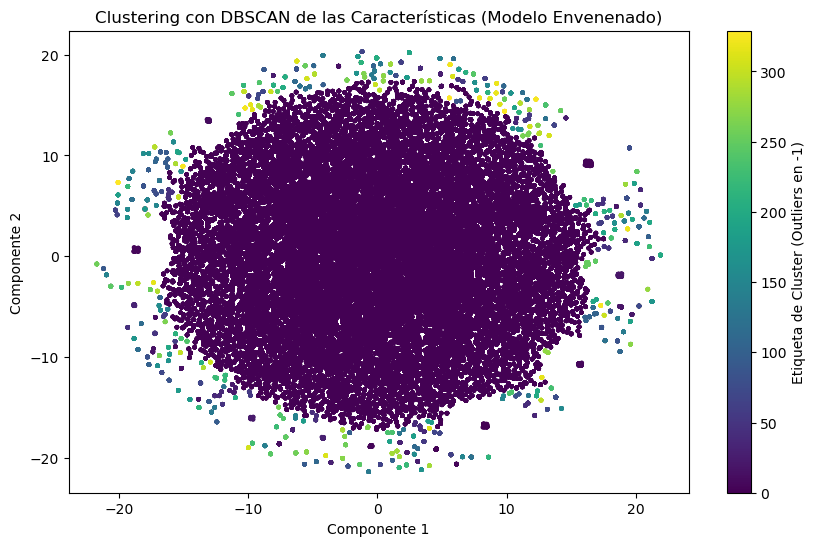

C:\Users\n.segura\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8993 - loss: 0.2861 - val_accuracy: 0.9766 - val_loss: 0.0709
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9796 - loss: 0.0627 - val_accuracy: 0.9821 - val_loss: 0.0487
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9826 - loss: 0.0467 - val_accuracy: 0.9845 - val_loss: 0.0403
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9845 - loss: 0.0398 - val_accuracy: 0.9860 - val_loss: 0.0356
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9861 - loss: 0.0346 - val_accuracy: 0.9866 - val_loss: 0.0321
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9873 - loss: 0.0317 - val_accuracy: 0.9902 - val_loss: 0.0295
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9899 - loss: 0.0293 - val_accuracy: 0.9902 - val_loss: 0.0283
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9903 - loss: 0.0272 - val_accuracy: 0.9909 - v

C:\Users\n.segura\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited at iteration 219 with accuracies 
[1.14852426e-15 1.79925220e-05 1.08116749e-04 2.30360968e-05]
not reaching the requested tolerance 2.650916576385498e-05.
Use iteration 158 instead with accuracy 
1.7711351725096402e-05.

  _, diffusion_map = lobpcg(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited postprocessing with accuracies 
[1.27136376e-15 1.35168793e-05 2.11255096e-05 3.62030180e-05]
not reaching the requested tolerance 2.650916576385498e-05.
  _, diffusion_map = lobpcg(
C:\Users\n.segura\AppData\Roaming\Python\Python312\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
fail

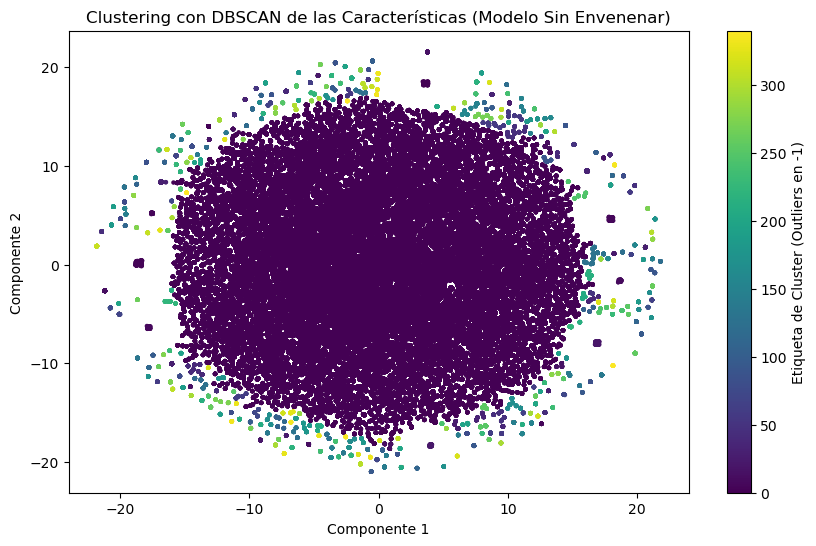

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


NameError: name 'detected_poisoned_indices' is not defined

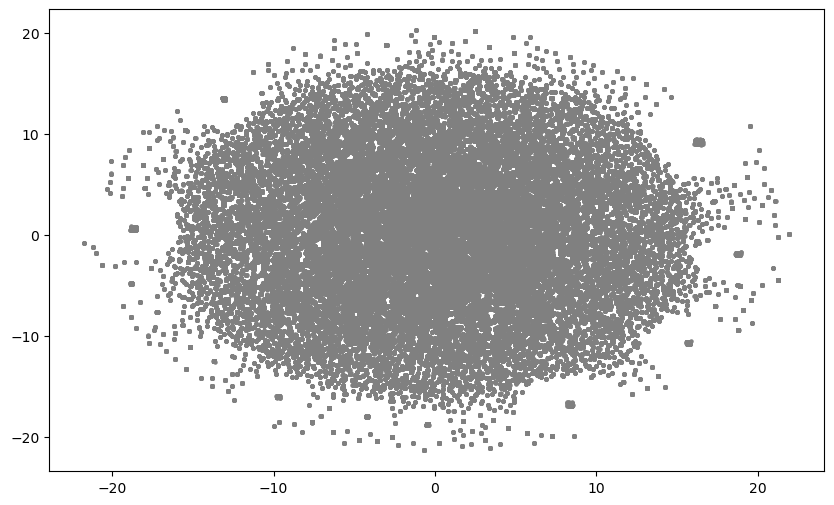

In [74]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from umap import UMAP

# Suponiendo que ya tienes X_train y y_train cargados
# Para fines de ejemplo, generaré datos sintéticos
#np.random.seed(42)
#num_samples = 1000
#input_dim = X_train.shape[1]   # Número de características
#X_train = pd.DataFrame(np.random.rand(num_samples, input_dim))
#y_train = pd.Series(np.zeros(num_samples, dtype=int))  # Todas las etiquetas iniciales son 0 (benignas)

# Función para envenenar las etiquetas
def poison_target_variable(y_train, benign_percentage):
    # Determinar cuántas muestras serán benignas y cuántas serán de ataques
    total_samples = len(y_train)
    num_benign = int(total_samples * benign_percentage)
    num_attack = total_samples - num_benign
    
    # Crear una copia para no modificar el original
    y_poisoned = y_train.copy()
    
    # Obtener los índices benignos disponibles
    benign_indices = y_poisoned[y_poisoned == 0].index.tolist()
    
    # Asegurarse de que num_attack no sea mayor que la cantidad de índices benignos
    num_attack = min(num_attack, len(benign_indices))
    
    # Cambiar aleatoriamente algunos datos a ataques (etiqueta 1)
    attack_indices = np.random.choice(benign_indices, size=num_attack, replace=False)
    y_poisoned.loc[attack_indices] = 1
    
    return y_poisoned, attack_indices

# Envenenar las etiquetas
benign_percentage = 1  # 90% benigno, 10% ataques
y_train_poisoned, poisoned_indices = poison_target_variable(y_train['intrusion'], benign_percentage)

### Análisis con Etiquetas Envenenadas ###

# Paso 1: Entrenar el modelo con datos envenenados
mlp_poisoned = Sequential(name='mlp_poisoned')
mlp_poisoned.add(Dense(64, activation='relu', input_shape=(input_dim,), name='dense_1'))
mlp_poisoned.add(Dense(64, activation='relu', name='dense_2'))
mlp_poisoned.add(Dense(1, activation='sigmoid', name='dense_output'))

mlp_poisoned.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

mlp_poisoned.fit(X_train, y_train_poisoned, epochs=100, batch_size=5000, validation_split=0.2)

# Paso 2: Extraer características de una capa intermedia
intermediate_layer_model_poisoned = Model(inputs=mlp_poisoned.layers[0].input, outputs=mlp_poisoned.get_layer('dense_2').output)
features_poisoned = intermediate_layer_model_poisoned.predict(X_train)

# Paso 3: Escalar las características
scaler_poisoned = StandardScaler()
features_scaled_poisoned = scaler_poisoned.fit_transform(features_poisoned)

# Paso 4: Reducir dimensionalidad con UMAP
reducer_poisoned = UMAP(n_components=2, random_state=42)
features_reduced_poisoned = reducer_poisoned.fit_transform(features_scaled_poisoned)

# Paso 5: Aplicar DBSCAN
dbscan_poisoned = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels_poisoned = dbscan_poisoned.fit_predict(features_reduced_poisoned)

# Paso 6: Visualización de los clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_reduced_poisoned[:, 0], features_reduced_poisoned[:, 1], c=dbscan_labels_poisoned, cmap='viridis', s=5)
plt.colorbar(scatter, label='Etiqueta de Cluster (Outliers en -1)')
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Clustering con DBSCAN de las Características (Modelo Envenenado)")
plt.show()

# Continuar con los pasos para el modelo envenenado (cálculo de centroides, desviaciones, misclasificación, etc.)

### Análisis con Etiquetas Sin Envenenar ###

# Paso 1: Entrenar el modelo con datos sin envenenar
mlp_clean = Sequential(name='mlp_clean')
mlp_clean.add(Dense(64, activation='relu', input_shape=(input_dim,), name='dense_1'))
mlp_clean.add(Dense(64, activation='relu', name='dense_2'))
mlp_clean.add(Dense(1, activation='sigmoid', name='dense_output'))

mlp_clean.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

mlp_clean.fit(X_train, y_train, epochs=100, batch_size=5000, validation_split=0.2)

# Paso 2: Extraer características de una capa intermedia
intermediate_layer_model_clean = Model(inputs=mlp_clean.layers[0].input, outputs=mlp_clean.get_layer('dense_2').output)
features_clean = intermediate_layer_model_clean.predict(X_train)

# Paso 3: Escalar las características
scaler_clean = StandardScaler()
features_scaled_clean = scaler_clean.fit_transform(features_clean)

# Paso 4: Reducir dimensionalidad con UMAP
reducer_clean = UMAP(n_components=2, random_state=42)
features_reduced_clean = reducer_clean.fit_transform(features_scaled_clean)

# Paso 5: Aplicar DBSCAN
dbscan_clean = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels_clean = dbscan_clean.fit_predict(features_reduced_clean)

# Paso 6: Visualización de los clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_reduced_clean[:, 0], features_reduced_clean[:, 1], c=dbscan_labels_clean, cmap='viridis', s=5)
plt.colorbar(scatter, label='Etiqueta de Cluster (Outliers en -1)')
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Clustering con DBSCAN de las Características (Modelo Sin Envenenar)")
plt.show()

# Continuar con los pasos para el modelo sin envenenar (cálculo de centroides, desviaciones, misclasificación, etc.)

### Comparación de Resultados ###

# Para ambos modelos, puedes incluir los pasos para calcular los centroides, desviaciones, tasas de misclasificación y luego visualizar las muestras envenenadas detectadas.

# Por ejemplo, para el modelo envenenado:

# Paso 7: Identificar clusters y calcular centroides
unique_clusters_poisoned = set(dbscan_labels_poisoned) - {-1}  # Excluir los outliers
centroids_poisoned = {}
for cluster_label in unique_clusters_poisoned:
    cluster_indices = np.where(dbscan_labels_poisoned == cluster_label)[0]
    cluster_features = features_scaled_poisoned[cluster_indices]
    centroid = np.mean(cluster_features, axis=0)
    centroids_poisoned[cluster_label] = centroid

# Paso 8: Calcular el centroide benigno
benign_indices_poisoned = [i for i in range(len(y_train_poisoned)) if i not in poisoned_indices]
X_benign_validation_poisoned = X_train.iloc[benign_indices_poisoned[:100]]
benign_features_poisoned = intermediate_layer_model_poisoned.predict(X_benign_validation_poisoned)
benign_features_scaled_poisoned = scaler_poisoned.transform(benign_features_poisoned)
benign_centroid_poisoned = np.mean(benign_features_scaled_poisoned, axis=0)

# Continuar con desviaciones, misclasificación y visualización de las muestras envenenadas detectadas como antes.

# Visualización de las muestras envenenadas detectadas en el modelo envenenado:

# Supongamos que tienes los índices de las muestras envenenadas detectadas en detected_poisoned_indices_poisoned

# Paso 9: Visualizar las muestras envenenadas detectadas
plt.figure(figsize=(10, 6))
plt.scatter(features_reduced_poisoned[:, 0], features_reduced_poisoned[:, 1], c='gray', s=5, label='Muestras Benignas')
plt.scatter(features_reduced_poisoned[detected_poisoned_indices, 0], features_reduced_poisoned[detected_poisoned_indices, 1], c='red', s=10, label='Muestras Envenenadas Detectadas')
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Muestras Envenenadas Detectadas en el Modelo Envenenado")
plt.legend()
plt.show()

# Realiza pasos similares para el modelo sin envenenar, aunque esperamos que se detecten pocas o ninguna muestra como envenenada.



C:\Users\n.segura\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Modelo Envenenado - Excentricidad: 0.85, Relación de Ejes: 1.89
Modelo Sin Envenenar - Excentricidad: 0.86, Relación de Ejes: 1.95


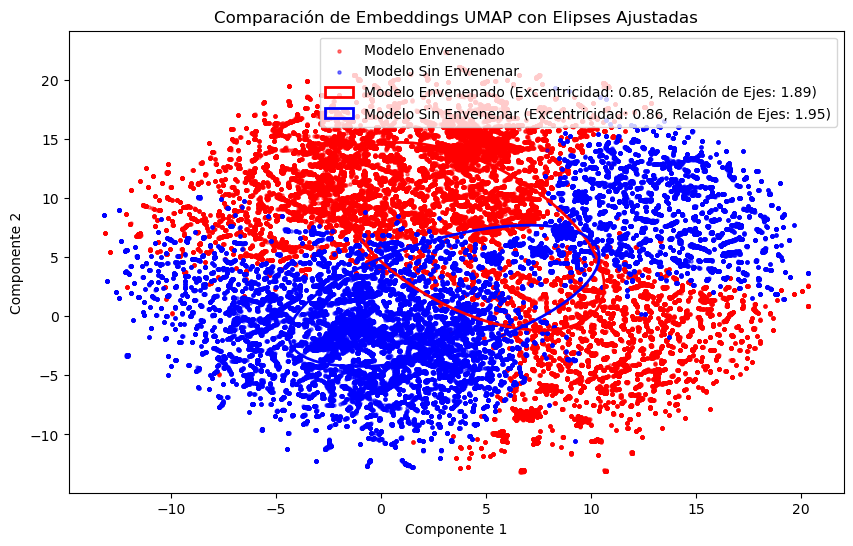

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from umap import UMAP
import joblib
from matplotlib.patches import Ellipse
import gc

# Configurar joblib para evitar paralelismo excesivo
joblib.parallel_backend('threading', n_jobs=1)

# Concatenar las características escaladas de ambos modelos
features_combined = np.vstack((features_scaled_poisoned, features_scaled_clean))
labels_combined = np.array(['Envenenado'] * len(features_scaled_poisoned) + ['Sin Envenenar'] * len(features_scaled_clean))

# Subsamplear los datos
subsample_rate = 0.1  # Reducir el subsampleo al 10%
indices = np.random.choice(range(features_combined.shape[0]), int(features_combined.shape[0] * subsample_rate), replace=False)
features_subsampled = features_combined[indices]
labels_subsampled = labels_combined[indices]

# Reducir dimensionalidad con PCA
pca = PCA(n_components=50, random_state=42)
features_subsampled_pca = pca.fit_transform(features_subsampled)

# Liberar memoria
del features_combined
gc.collect()

# Aplicar UMAP
reducer_combined = UMAP(
    n_components=2,
    random_state=42,
    n_neighbors=5,
    low_memory=True,
    metric='cosine'
)
features_reduced_combined = reducer_combined.fit_transform(features_subsampled_pca)

# Separar las características reducidas por etiquetas
features_reduced_poisoned_aligned = features_reduced_combined[labels_subsampled == 'Envenenado']
features_reduced_clean_aligned = features_reduced_combined[labels_subsampled == 'Sin Envenenar']

# Función para ajustar una elipse y calcular excentricidad y relación de ejes
def plot_ellipse_and_metrics(data, color, label):
    # Ajustar una elipse usando PCA
    pca = PCA(n_components=2)
    pca.fit(data)
    eigenvalues = pca.explained_variance_
    eigenvectors = pca.components_

    # Obtener longitudes de los ejes principales
    axis_length_1 = np.sqrt(eigenvalues[0])
    axis_length_2 = np.sqrt(eigenvalues[1])

    # Calcular excentricidad y relación de ejes
    excentricidad = np.sqrt(1 - (axis_length_2 ** 2 / axis_length_1 ** 2))
    relacion_ejes = axis_length_1 / axis_length_2

    # Configuración de la elipse
    angle = np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0])
    ellipse = Ellipse(
        np.mean(data, axis=0),
        width=axis_length_1 * 2,
        height=axis_length_2 * 2,
        angle=np.degrees(angle),
        edgecolor=color,
        facecolor='none',
        linewidth=2,
        label=f'{label} (Excentricidad: {excentricidad:.2f}, Relación de Ejes: {relacion_ejes:.2f})'
    )

    # Mostrar métricas en consola
    print(f"{label} - Excentricidad: {excentricidad:.2f}, Relación de Ejes: {relacion_ejes:.2f}")

    # Añadir la elipse a la gráfica
    plt.gca().add_patch(ellipse)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(
    features_reduced_poisoned_aligned[:, 0],
    features_reduced_poisoned_aligned[:, 1],
    c='red',
    s=5,
    label='Modelo Envenenado',
    alpha=0.5
)
plt.scatter(
    features_reduced_clean_aligned[:, 0],
    features_reduced_clean_aligned[:, 1],
    c='blue',
    s=5,
    label='Modelo Sin Envenenar',
    alpha=0.5
)

# Calcular y graficar las elipses
plot_ellipse_and_metrics(features_reduced_poisoned_aligned, 'red', 'Modelo Envenenado')
plot_ellipse_and_metrics(features_reduced_clean_aligned, 'blue', 'Modelo Sin Envenenar')

plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
plt.title("Comparación de Embeddings UMAP con Elipses Ajustadas")
plt.show()
